
Definimos al Modelo SIR como:
$$\frac{dS}{dt} = -\beta*S*I$$
$$\frac{dI}{dt} = \beta*S*I - \gamma * I$$
$$\frac{dR}{dt} = \gamma*I $$
Donde $\beta$ es ka tasa de contagio y $\gamma$ es la tasa de recuperacion

# Simulo con RK(4)

In [100]:
1/23

0.043478260869565216

In [101]:
beta =0.27
gama = .043

S=lambda s_tn0,i_tn0,r_tn0,t:-beta*s_tn0*i_tn0
I=lambda s_tn0,i_tn0,r_tn0,t:beta*s_tn0*i_tn0 - gama * i_tn0
R=lambda s_tn0,i_tn0,r_tn0,t: gama * i_tn0
    

In [102]:
#R-K4
def step_fn(s_tn0,i_tn0,r_tn0,t,h):
    params = s_tn0,i_tn0,r_tn0,t
    k1,l1,j1 = h*S(*params),h*I(*params),h*R(*params)

    params = s_tn0+k1/2,i_tn0+l1/2,r_tn0+j1/2,t+h/2
    k2,l2,j2 = h*S(*params),h*I(*params),h*R(*params)

    params = s_tn0+k2/2,i_tn0+l2/2,r_tn0+j2/2,t+h/2
    k3,l3,j3 = h*S(*params),h*I(*params),h*R(*params)

    params = s_tn0+k3,i_tn0+l3,r_tn0+j3,t+h
    k4,l4,j4 = h*S(*params),h*I(*params),h*R(*params)

    s_tn1 = s_tn0 + 1/6*(k1+2*k2+2*k3+k4)
    i_tn1 = i_tn0 + 1/6*(l1+2*l2+2*l3+l4)
    r_tn1 = r_tn0 + 1/6*(j1+2*j2+2*j3+j4)

    return s_tn1,i_tn1,r_tn1

In [103]:
def simulate(prc,h,tf,horizontal=None,ignorepop=False):    
    s_tn0,i_tn0,r_tn0 = 1*(1-prc),prc,0
    dc = {}
    if not ignorepop:
        dc['s'] =[s_tn0]
    dc['i'] = [i_tn0]
    dc['r'] = [r_tn0]
    dc['t'] = [0]
    if horizontal!=None:        
        dc['zz'] =[horizontal]
    for t in range(1,tf):        
        s_tn0,i_tn0,r_tn0 = step_fn(s_tn0,i_tn0,r_tn0,t,h)     
        if not ignorepop:
            dc['s'].append(s_tn0)
        dc['i'].append(i_tn0)
        dc['r'].append(r_tn0)
        if horizontal!=None:
            dc['zz'].append(horizontal)
        dc['t'].append(t*h)
    ax = pd.DataFrame(dc).plot(x='t',figsize=(7,7))
    leyendas=['Infectados','Curados']
    
    if horizontal!=None:
        leyendas = leyendas+['Limite']
    if not ignorepop:
        leyendas = ['Sanos']+leyendas
    ax.legend(leyendas)
    ax.set_ylabel('# Personas')
    ax.set_xlabel('Días')
    plt.show()
    None

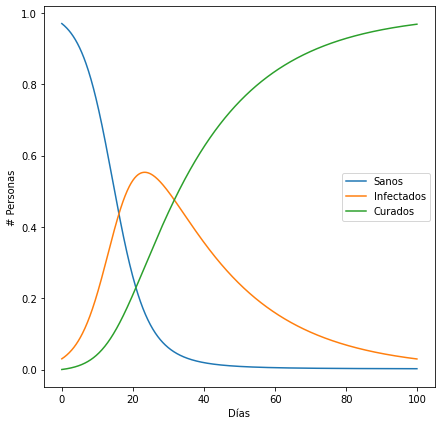

In [104]:
import matplotlib.pyplot as plt
import pandas as pd


simulate(.03,.1,1000)
    

Ahora sabemos que nuestros hospitales tienen capacidad para 30% de la poblacion. Entonces no queremos que la curva de infectados supere este valor. Para esto modificamos el valor de $\beta$, que lo podemos interpretar como medidas de aislamiento, que disminuyen esta tasa de transmicion.


In [105]:
def get_grande():
    prc=.03
    s_tn0,i_tn0,r_tn0 = 1*(1-prc),prc,0    
    lt = {'x':[],'y':[]}
    for i in range(30000):    
        s_tn0,tmp,r_tn0 = step_fn(s_tn0,i_tn0,r_tn0,0,.01)     
        if tmp<i_tn0:
            return i_tn0        
        i_tn0=tmp
    return -1


In [106]:
alto = 1
bajo = .1
beta = 1
n = get_grande()
#while .2999999999999999>=n or n>=.3000000000000000001:
while n!=.3:
    print(n,beta)
    
    beta = (alto+bajo)/2
    n = get_grande()
    if n>.3:
        alto = beta
    else:
        bajo = beta
beta

0.8230075997285216 1
0.7249361005290426 0.55
0.604113434418794 0.325
0.48050278212493264 0.21250000000000002
0.378103591172875 0.15625
0.3081918244333043 0.128125
0.26672876279383106 0.1140625
0.2880644432747561 0.12109375
0.2982746699036039 0.124609375
0.3032692968487775 0.12636718749999998
0.30078107027419715 0.12548828125
0.2995301495380622 0.125048828125
0.3001561792767491 0.1252685546875
0.29984331027052097 0.12515869140625002
0.2999997787448661 0.125213623046875
0.30007798525840945 0.1252410888671875
0.30003888880636703 0.12522735595703124
0.3000193332060023 0.12522048950195314
0.30000955353681164 0.12521705627441407
0.30000466593337216 0.12521533966064452
0.3000022223780697 0.12521448135375976
0.30000100057120527 0.1252140522003174
0.30000038966047143 0.1252138376235962
0.3000000842032763 0.12521373033523558
0.2999999314742261 0.1252136766910553
0.30000000783878755 0.12521370351314542
0.2999999696565139 0.12521369010210037
0.2999999887476529 0.1252136968076229
0.2999999982932193

0.12521370075986943

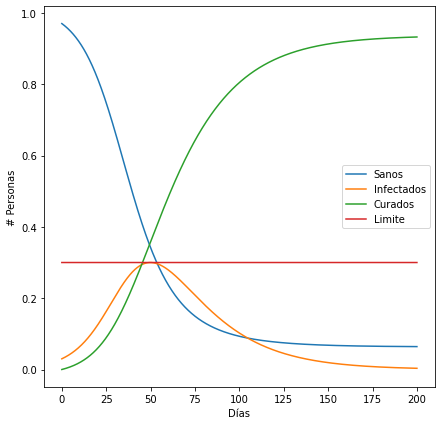

In [107]:
beta = .12521370075986948
simulate(.03,.1,2000,0.3)